# MIT_8.S50 Recitation 12: Frequency analysis using the DFT

Author: Juan Mena-Parra

Date: December 08, 2021


# Import modules

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
from IPython.core.display import Image 

rcParams['figure.figsize'] = (20.0, 8.0)

# Preliminaries

QUESTION: What is the Fourier transform of $f(t)=\sin(\omega t)$? and of $f(t)=e^{i\omega t}$?

# DFT

The discrete Fourier transform (DFT) of a discrete signal $f(n)$ of lenght $N$ is

$F(k) = \sum_{n=0}^{N-1} f(n)e^{-i2\pi k n/N}$

The inverse discrete Fourier transform (IDFT) is

$x(n) = \frac{1}{N}\sum_{k=0}^{N-1} F(k)e^{i2\pi k n/N}$

For what follows, you may need to write functions that implement the DFT and IDFT of a function for given values of $k$ and $n$, respectively


In [ ]:
def mydft(x, k):
  N = len(x)
  n = np.arange(N)
  W = np.exp(-1j*2*np.pi/N)
  return np.array([np.sum(x*W**(kk*n)) for kk in k])

def myidft(X, n):
  N = len(x)
  k = np.arange(N)
  W_conj = np.exp(1j*2*np.pi/N)
  return np.array([np.sum(X*W_conj**(k*nn)) for nn in n])/N

Consider the discrete function $x(n)=\sin(2\pi\cdot 0.02n)$

Plot $x(n)$

QUESTION: What is the period of $x(n)$ in samples? This corresponds to an analog signal sampled at 100 Hz. What was the period of the analog signal in seconds?

For $N=100$ compute the $X(k)=DFT\{x(n)\}$ for $k=0, \cdots N-1$. Plot |X(k)| vs $k$. 

QUESTION: Is |X(k)| what you expected based on your intuition from the Fourier transform of a sine function of continuous time $t$? yes/no, why?

Compute $y(n)=IDFT\{X(k)\}$ for $n=0, \cdots N-1$. Plot $y(n)$ vs $n$.

QUESTION: is $y(n)=x(n)$ from $n=0, \cdots N-1$? yes/no, why?

Compute $z(n)=IDFT\{X(k)\}$ for $n=0, \cdots 3N-1$. Plot $z(n)$ vs $n$.

QUESTION: is $z(n)=x(n)$ from $n=0, \cdots 3N-1$? yes/no, why?


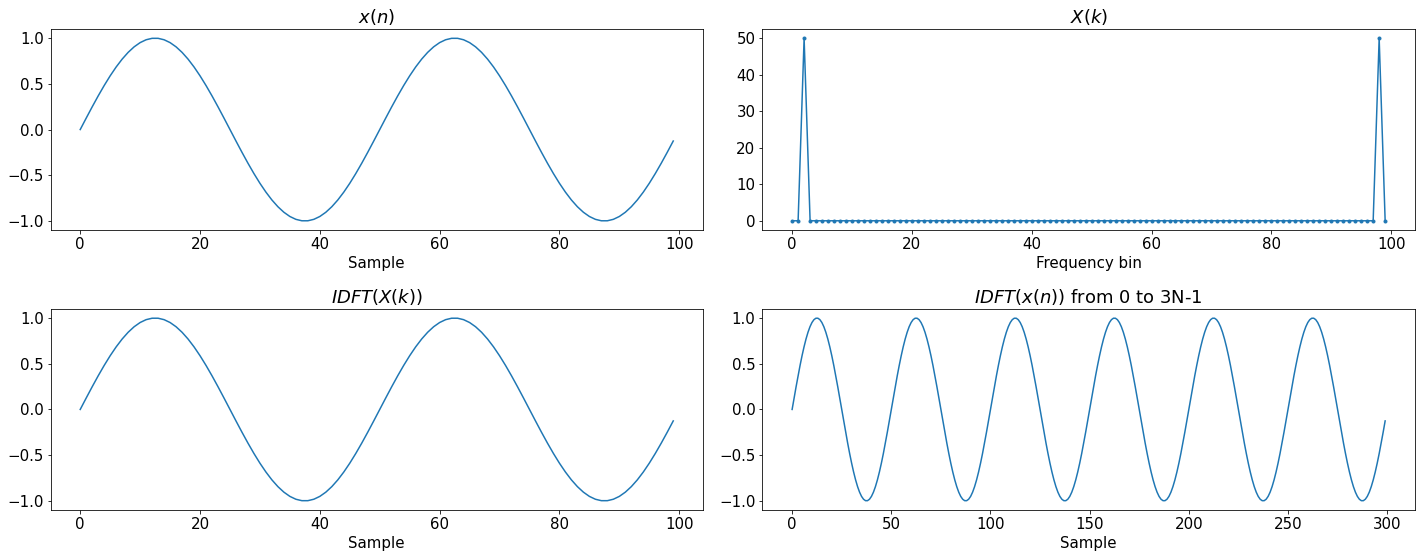

In [ ]:
N = 100
f = .02
A = 1.
phi0 = 0.

n = np.arange(N)
x = A*np.sin(2*np.pi*f*n)
k = np.arange(N)
X = mydft(x, k)
x1 = myidft(X, n).real
n2 = np.arange(3*N)
x2 = myidft(X, n2).real

hf = figure(num=1, figsize=(20, 8))
matplotlib.rcParams.update({'font.size': 15})

subplot(221)
plot(n, x)
xlabel('Sample')
title('$x(n)$')
subplot(222)
plot(k, abs(X), '.-')
xlabel('Frequency bin')
title('$X(k)$')
subplot(223)
plot(n, x1)
xlabel('Sample')
title('$IDFT(X(k))$')
subplot(224)
plot(n2, x2)
xlabel('Sample')
title('$IDFT(x(n))$ from 0 to 3N-1')
tight_layout()

Repeat the same procedure above and answer the same questions for $x(n)=\sin(2\pi\cdot 0.025n)$


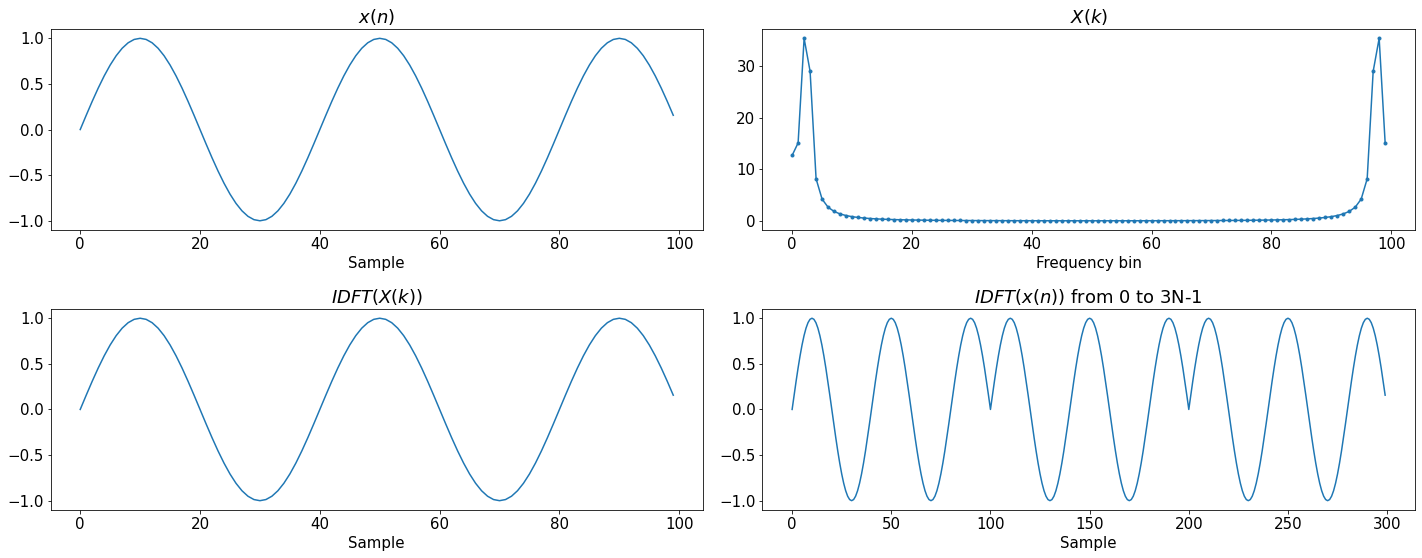

In [ ]:
N = 100
f = .025
A = 1.
phi0 = 0.

n = np.arange(N)
x = A*np.sin(2*np.pi*f*n)
k = np.arange(N)
X = mydft(x, k)
x1 = myidft(X, n).real
n2 = np.arange(3*N)
x2 = myidft(X, n2).real

hf = figure(num=1, figsize=(20, 8))
matplotlib.rcParams.update({'font.size': 15})

subplot(221)
plot(n, x)
xlabel('Sample')
title('$x(n)$')
subplot(222)
plot(k, abs(X), '.-')
xlabel('Frequency bin')
title('$X(k)$')
subplot(223)
plot(n, x1)
xlabel('Sample')
title('$IDFT(X(k))$')
subplot(224)
plot(n2, x2)
xlabel('Sample')
title('$IDFT(x(n))$ from 0 to 3N-1')
tight_layout()

# DFT to invert the covariance matrix for the CMB project

QUESTION: How does the DFT help with the inversion of $C_N^{-1}$ for the CMB project? What are the trade-offs, if any?